<a href="https://colab.research.google.com/github/anshvarshney11/text-to-image-stable-diffusion/blob/main/Text_to_Image_using_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers torch accelerate matplotlib



In [2]:
# Import necessary libraries
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt


In [3]:
from huggingface_hub import login

# Replace with your Hugging Face token
login(token="validators should use their own token")


In [2]:
from diffusers import StableDiffusionPipeline
import torch

# Load the Stable Diffusion 2.1 model from Hugging Face (Stable version) with float32 precision
model = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1")

# Ensure the model runs on GPU if available, otherwise it will use CPU
model.to("cuda" if torch.cuda.is_available() else "cpu")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stabilityai/stable-diffusion-2-1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/100 [00:00<?, ?it/s]

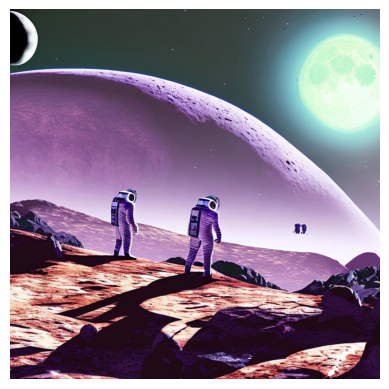

In [11]:
# Define a more detailed and descriptive text prompt
prompt = "A majestic fantasy landscape with towering mountains, a crystal-clear lake reflecting the sky, and vibrant colorful flowers surrounding ancient stone ruins."

# Set generation parameters
num_inference_steps = 100  # More steps = better quality, higher detail
guidance_scale = 12  # Higher = more accurate to the text prompt

generator = torch.manual_seed(42)

# Generate the image based on the prompt and settings
image = model(prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale, generator=generator).images[0]

# Display the generated image
plt.imshow(image)
plt.axis('off')  # Hide axes for a cleaner display
plt.show()

# Optionally save the generated image
image.save("generated_image.png")